In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def sample_obj_and_dst_pose():
    # if mobile:
    #     obj_x_range = [0.55, 0.8]
    #     dst_x_range = [0.55, 0.8]
    #     y_range = [-0.75, 0.15]
    #     z_range = [0.85, 0.85]
    # else:
    obj_x_range = [-0.1, 0.3]
    dst_x_range = [-0.1, 0.3]
    y_range = [0.3, 0.8]
    z_range = [0.015, 0.015]
    obj_angle_range = [0, 180]
    obj_dst_interval = 0.1    

    obj_ranges = np.vstack([obj_x_range, y_range, z_range])
    obj_position = np.random.uniform(obj_ranges[:, 0], obj_ranges[:, 1])
    obj_angle = np.random.uniform(obj_angle_range[0], obj_angle_range[1])    
    obj_quat = np.array([np.cos(np.deg2rad(obj_angle)/2), 0, 0, np.sin(np.deg2rad(obj_angle)/2)])    
    dst_ranges = np.vstack([dst_x_range, y_range, z_range])
    dst_position = np.random.uniform(dst_ranges[:, 0], dst_ranges[:, 1])

    while np.linalg.norm(dst_position[:2] - obj_position[:2]) < 0.055+0.002+obj_dst_interval:
        dst_position = np.random.uniform(dst_ranges[:, 0], dst_ranges[:, 1])
    dst_quat = np.array([1, 0, 0, 0])
    return np.concatenate([obj_position, obj_quat, dst_position, dst_quat])



OBJ_R = 0.2
OBJ_OFFSET_X = 0.55
OBJ_OFFSET_Y = -0.3
OBJ_ANGLE_RANGE = [0, np.pi]

DST_R = 0.3
DST_OFFSET_X = 0.65
DST_OFFSET_Y = -0.3
DST_ANGLE_RANGE = [-np.pi/8, np.pi+np.pi/8]

def sample_obj_and_dst_pose_mobile():  
    z_range = [0.815, 0.815]  
    obj_angle_range = [0, 180]
    obj_dst_interval = 0.1    

    theta = np.random.uniform(OBJ_ANGLE_RANGE[0], OBJ_ANGLE_RANGE[1])
    # r = np.random.uniform(0, R)
    r = OBJ_R * np.sqrt(np.random.uniform(0, 1)) 
    x = OBJ_OFFSET_X + r*np.sin(theta)
    y = OBJ_OFFSET_Y + r*np.cos(theta)
    z = np.random.uniform(z_range[0], z_range[1])
    obj_position = np.array([x, y, z])    
    obj_angle = np.random.uniform(obj_angle_range[0], obj_angle_range[1])    
    obj_quat = np.array([np.cos(np.deg2rad(obj_angle)/2), 0, 0, np.sin(np.deg2rad(obj_angle)/2)])    

    theta = np.random.uniform(DST_ANGLE_RANGE[0], DST_ANGLE_RANGE[1])
    # r = np.random.uniform(0, R)
    r = DST_R * np.sqrt(np.random.uniform(0, 1)) 
    x = DST_OFFSET_X + r*np.sin(theta)
    y = DST_OFFSET_Y + r*np.cos(theta)
    z = np.random.uniform(z_range[0], z_range[1])
    dst_position = np.array([x, y, z])    

    while np.linalg.norm(dst_position[:2] - obj_position[:2]) < 0.055+0.002+obj_dst_interval:
        theta = np.random.uniform(DST_ANGLE_RANGE[0], DST_ANGLE_RANGE[1])
        # r = np.random.uniform(0, R)
        r = DST_R * np.sqrt(np.random.uniform(0, 1)) 
        x = DST_OFFSET_X + r*np.sin(theta)
        y = DST_OFFSET_Y + r*np.cos(theta)
        z = np.random.uniform(z_range[0], z_range[1])
        dst_position = np.array([x, y, z])    
    dst_quat = np.array([1, 0, 0, 0])
    return np.concatenate([obj_position, obj_quat, dst_position, dst_quat])







In [7]:
N = 10000
MERGIN = 0.01
ALPHA = 0.6
SIZE = 1.5

In [8]:

obj_xys = []
dst_xys = []
for _ in range(N):
    obj_and_dst_pose = sample_obj_and_dst_pose()
    obj_xy = obj_and_dst_pose[:2]
    obj_xys.append(obj_xy)
    dst_xy = obj_and_dst_pose[7:9]
    dst_xys.append(dst_xy)

obj_xs, obj_ys = np.array(obj_xys)[:, 0], np.array(obj_xys)[:, 1]
dst_xs, dst_ys = np.array(dst_xys)[:, 0], np.array(dst_xys)[:, 1]

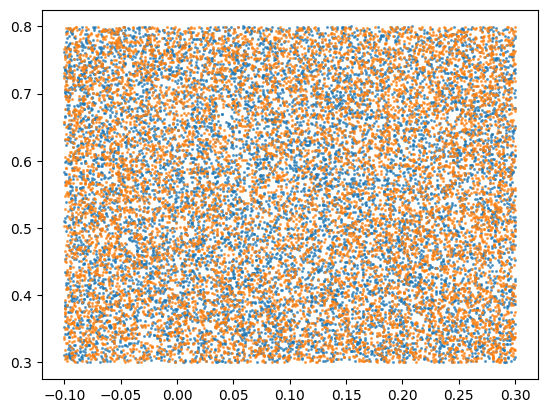

In [9]:
plt.figure()
plt.scatter(obj_xs, obj_ys, alpha=ALPHA, s=SIZE)

plt.scatter(dst_xs, dst_ys, alpha=ALPHA, s=SIZE)
plt.show()

In [10]:
obj_xys = []
dst_xys = []
for _ in range(N):
    obj_and_dst_pose = sample_obj_and_dst_pose_mobile()
    obj_xy = obj_and_dst_pose[:2]
    obj_xys.append(obj_xy)
    dst_xy = obj_and_dst_pose[7:9]
    dst_xys.append(dst_xy)


obj_xs, obj_ys = np.array(obj_xys)[:, 0], np.array(obj_xys)[:, 1]
dst_xs, dst_ys = np.array(dst_xys)[:, 0], np.array(dst_xys)[:, 1]

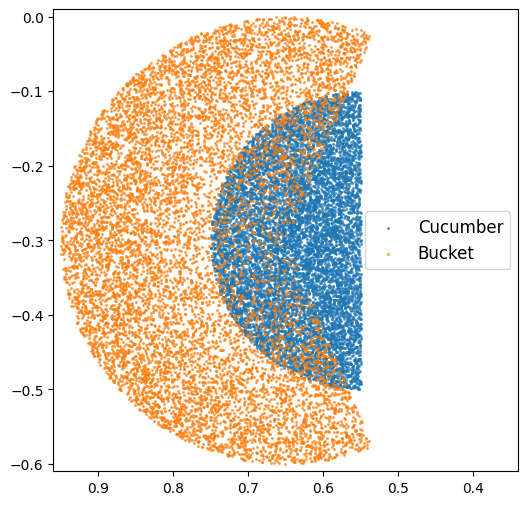

In [11]:


plt.figure(figsize=(6, 6))
plt.scatter(obj_xs, obj_ys, alpha=ALPHA, s=SIZE, label="Cucumber")
plt.scatter(dst_xs, dst_ys, alpha=ALPHA, s=SIZE, label="Bucket")
plt.xlim(DST_OFFSET_X+DST_R+MERGIN, DST_OFFSET_X-DST_R-MERGIN)
plt.ylim(DST_OFFSET_Y-DST_R-MERGIN, DST_OFFSET_Y+DST_R+MERGIN)

plt.legend(fontsize=12)
plt.show()

In [12]:
# rs = []
# for _ in range(N):
#     r = R * np.sqrt(np.random.uniform(0, 1)) 
#     rs.append(r)


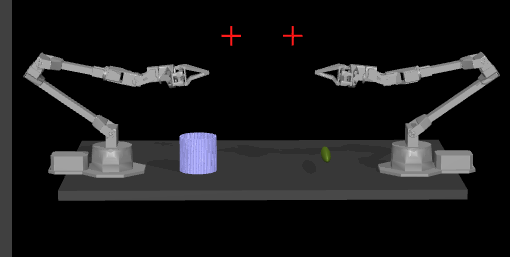


In [13]:
import matplotlib.patches as patches

In [14]:
def hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w, rect_h, num):
    rect_min_x = rect_center_x-rect_w/2
    rect_max_x = rect_center_x+rect_w/2
    rect_min_y = rect_center_y-rect_h/2
    rect_max_y = rect_center_y+rect_h/2
    
    min_x = min(circle_x-circle_r, rect_min_x)
    max_x = max(circle_x+circle_r, rect_max_x)    
    min_y = min(circle_y-circle_r, rect_min_y)
    max_y = max(circle_y+circle_r, rect_max_y)        

    fig = plt.figure()
    ax = plt.axes()
    
    c = patches.Circle(xy=(circle_x, circle_y), radius=circle_r, fc='g', ec='r', fill=False)
    r = patches.Rectangle(xy=(rect_center_x-rect_w/2, rect_center_y-rect_h/2), width=rect_w, height=rect_h, ec='#000000', fill=False)
    ax.add_patch(c)
    ax.add_patch(r)
    ax.set_aspect('equal')

    ax.set_xlim(-0.5, 1.0)
    ax.set_ylim(-0.3, 1.2)

    sample = np.random.uniform(low=[min_x, min_y], high=[max_x, max_y], size=(num, 2))

    in_rect = (rect_min_x < sample[:, 0]) & (sample[:, 0] < rect_max_x) & (rect_min_y < sample[:, 1]) & (sample[:, 1] < rect_max_y)
    in_circle = np.linalg.norm(sample - np.stack([circle_x, circle_y]), axis=1) < circle_r

    sample = sample[in_rect & in_circle]
    
    ax.scatter(*sample.T, alpha=0.8, s=1)
    ax.scatter(circle_x, circle_y)
    plt.grid()
    plt.show()

    print (len(sample))

In [23]:
circle_x = 0.295
circle_y = 0.414
circle_r = 0.564095655480825
# circle_r = 0.7

rect_center_x = -0.0235
rect_center_y = 0.9845
rect_offset = 0.05
rect_w = 0.272*2 
rect_h = 0.1785*2 

num = 10000



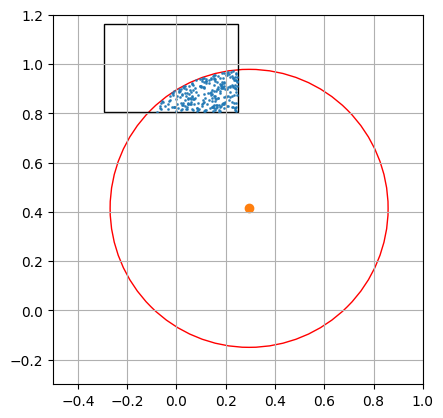

254


In [24]:
hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w, rect_h, num)

In [21]:
circle_x = 0.295
circle_y = 0.414
circle_r = 0.7525936357105392

rect_center_x = -0.0235
rect_center_y = 0.9845
rect_w = 0.272*2
rect_h = 0.1785*2

num = 10000



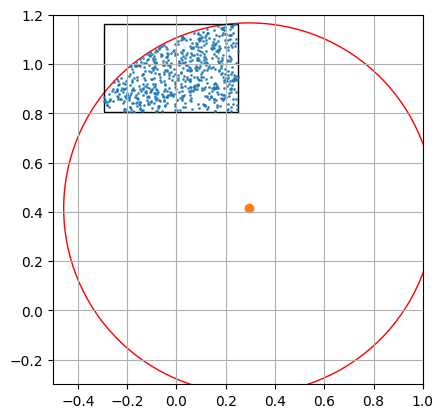

653


In [22]:

hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w, rect_h, num)

In [25]:
def hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w, rect_h):
    rect_min_x = rect_center_x-rect_w/2
    rect_max_x = rect_center_x+rect_w/2
    rect_min_y = rect_center_y-rect_h/2
    rect_max_y = rect_center_y+rect_h/2
    
    min_x = min(circle_x-circle_r, rect_min_x)
    max_x = max(circle_x+circle_r, rect_max_x)    
    min_y = min(circle_y-circle_r, rect_min_y)
    max_y = max(circle_y+circle_r, rect_max_y)        

    in_rect, in_circle = False, False

    while not (in_rect and in_circle):    
        sample = np.random.uniform(low=[min_x, min_y], high=[max_x, max_y])
        sample_x, sample_y = sample
        
        in_rect = (rect_min_x < sample_x) & (sample_x < rect_max_x) & (rect_min_y < sample_y) & (sample_y < rect_max_y)
        in_circle = np.linalg.norm(sample - np.stack([circle_x, circle_y])) < circle_r

    return sample

In [68]:
circle_x = 0.295
circle_y = 0.414

rect_center_x = -0.0235
rect_center_y = 0.9845

rect_offset = 0.05
rect_w = 0.272*2
rect_h = 0.1785*2

rect_w_offset = rect_w - rect_offset*2
rect_h_offset = rect_h - rect_offset*2

num = 1000


x_disp_min = -0.5
x_disp_max = 1.2
y_disp_min = -0.5
y_disp_max = 1.2

In [69]:
circle_r = 0.564095655480825


obj_samples = []
for _ in range(num):
    sample = hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w_offset, rect_h_offset)
    obj_samples.append(sample)

obj_samples = np.array(obj_samples)

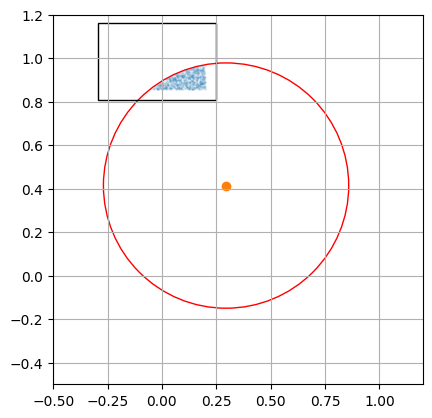

In [70]:
fig = plt.figure()
ax = plt.axes()

c = patches.Circle(xy=(circle_x, circle_y), radius=circle_r, fc='g', ec='r', fill=False)
r = patches.Rectangle(xy=(rect_center_x-rect_w/2, rect_center_y-rect_h/2), width=rect_w, height=rect_h, ec='#000000', fill=False)
ax.add_patch(c)
ax.add_patch(r)
ax.set_aspect('equal')

ax.set_xlim(x_disp_min, x_disp_max)
ax.set_ylim(y_disp_min, y_disp_max)

ax.scatter(*obj_samples.T, alpha=0.1, s=0.4)
ax.scatter(circle_x, circle_y)
plt.grid()
plt.show()

In [71]:
circle_r = 0.7525936357105392

dst_samples = []
for _ in range(num):
    sample = hit_or_miss_sample(circle_r, circle_x, circle_y, rect_center_x, rect_center_y, rect_w_offset, rect_h_offset)
    dst_samples.append(sample)

dst_samples = np.array(dst_samples)


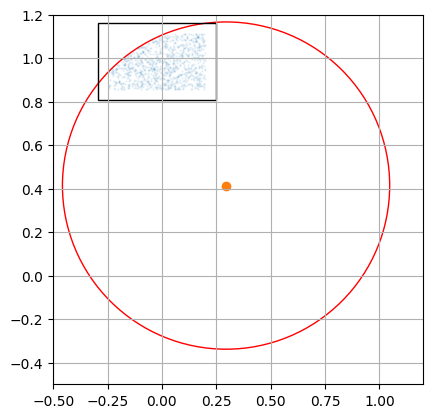

In [72]:

fig = plt.figure()
ax = plt.axes()

c = patches.Circle(xy=(circle_x, circle_y), radius=circle_r, fc='g', ec='r', fill=False)
r = patches.Rectangle(xy=(rect_center_x-rect_w/2, rect_center_y-rect_h/2), width=rect_w, height=rect_h, ec='#000000', fill=False)
ax.add_patch(c)
ax.add_patch(r)
ax.set_aspect('equal')

ax.set_xlim(x_disp_min, x_disp_max)
ax.set_ylim(y_disp_min, y_disp_max)

ax.scatter(*dst_samples.T, alpha=0.1, s=0.4)
ax.scatter(circle_x, circle_y)
plt.grid()
plt.show()

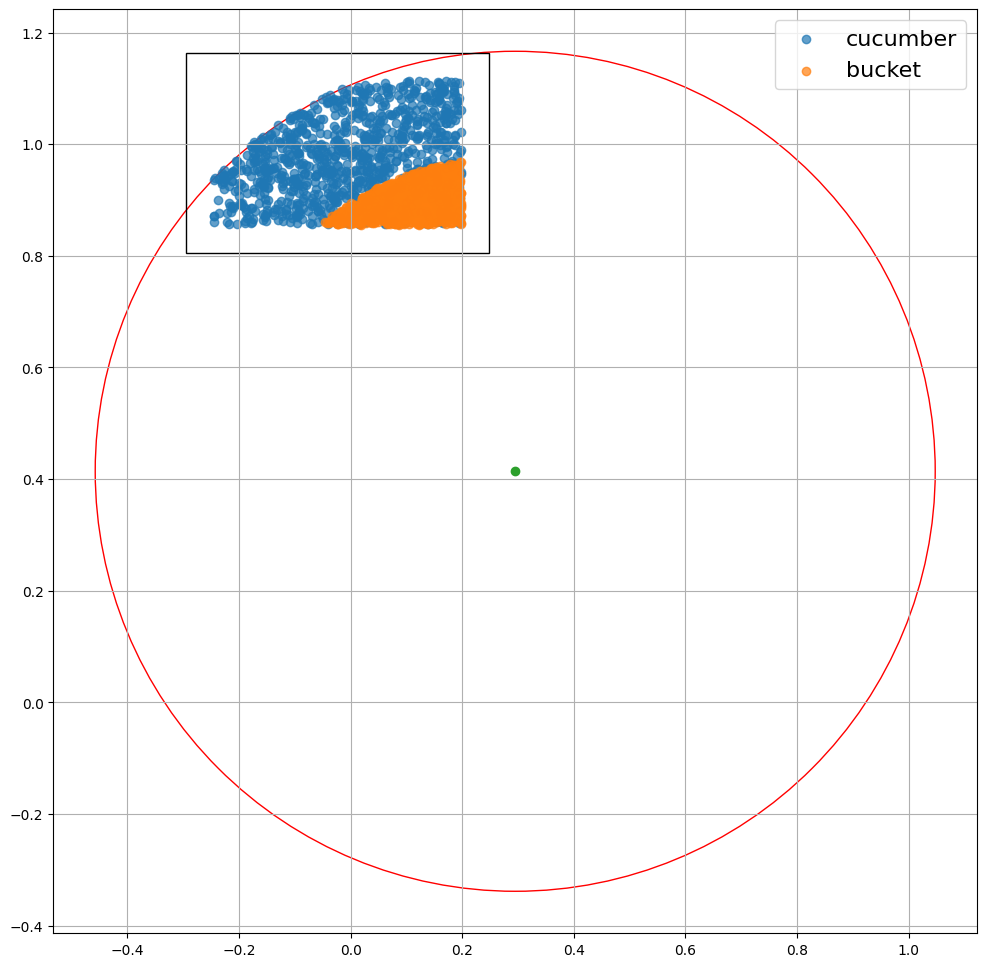

In [75]:

fig = plt.figure(figsize=(12, 12))
ax = plt.axes()

c = patches.Circle(xy=(circle_x, circle_y), radius=circle_r, fc='g', ec='r', fill=False)
r = patches.Rectangle(xy=(rect_center_x-rect_w/2, rect_center_y-rect_h/2), width=rect_w, height=rect_h, ec='#000000', fill=False)
ax.add_patch(c)
ax.add_patch(r)
ax.set_aspect('equal')


ax.scatter(*dst_samples.T, alpha=0.7, label="cucumber")
ax.scatter(*obj_samples.T, alpha=0.7, label="bucket")
ax.scatter(circle_x, circle_y)
plt.grid()
plt.legend(fontsize=16)
plt.show()